In [2]:
import urllib
import json
import re
import pandas as pd


In [3]:
baseurl = "https://en.wikipedia.org/w/api.php?"

action = "action=query"
urltitle = "titles=List_of_towns_and_cities_with_100,000_or_more_inhabitants"
content = "prop=revisions&rvprop=content&rvslots=main"
dataformat ="format=json"

query = f"{baseurl}{action}&{urltitle}&{content}&{dataformat}"

In [4]:
wikiresponse = urllib.request.urlopen(query)
wikidata = wikiresponse.read()
wikitext = wikidata.decode('utf-8')
data = json.loads(wikitext)

print(data)

{'batchcomplete': '', 'query': {'normalized': [{'from': 'List_of_towns_and_cities_with_100,000_or_more_inhabitants', 'to': 'List of towns and cities with 100,000 or more inhabitants'}], 'pages': {'6632364': {'pageid': 6632364, 'ns': 0, 'title': 'List of towns and cities with 100,000 or more inhabitants', 'revisions': [{'slots': {'main': {'contentmodel': 'wikitext', 'contentformat': 'text/x-wiki', '*': "{{Short description|Lists of places with more than 100,000 residents by country name.}}\n{{Dynamic a-list}}\n{{City 100000}}\n\n== By country name ==\n\n[[List of towns and cities with 100,000 or more inhabitants/country: A-B|A-B]]&nbsp;•\t[[List of towns and cities with 100,000 or more inhabitants/country: C-D-E-F|C-D-E-F]]&nbsp;•\t\t[[List of towns and cities with 100,000 or more inhabitants/country: G-H-I-J-K|G-H-I-J-K]]&nbsp;•\t[[List of towns and cities with 100,000 or more inhabitants/country: L-M-N-O|L-M-N-O]]&nbsp;•\t[[List of towns and cities with 100,000 or more inhabitants/cou

In [5]:
page = data['query']['pages']
for k in page.keys():
    page = page[k]['revisions'][0]['slots']['main']['*']

# Extract the country links from page
pattern = re.compile(r'\[\[List of towns and cities with 100,000 or more inhabitants/country: (.*?)\|')
matches = pattern.findall(page)

# Extract the country names from the list
countries = [match.split('|')[0] for match in matches]

list_by_country = []
for line in page.splitlines():
    match = re.match(r'^\[\[List of towns and cities with 100,000 or more inhabitants/country: (.*?)\|', line)
    if match:
        for country in countries:
            list_by_country.append(f"List_of_towns_and_cities_with_100,000_or_more_inhabitants/country:_{country}")


In [102]:
cities = []
provinces = []
for country in list_by_country:
    query = f"{baseurl}{action}&titles={country}&{content}&{dataformat}"
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    data = json.loads(wikitext)
    


    page = data['query']['pages']
    for k in page.keys():
        page = page[k]['revisions'][0]['slots']['main']['*']
        #disregard this images
        image_pattern = r"\[\[File:.*\]\]"
        page = re.sub(image_pattern, "", page)
        city_pattern = r"\|\s*\[\[([^\|,\]]+)(?:, ([^\|]+))?(?:\|([^\]]+))?\]\](?! Province)"
        found_cities = re.findall(city_pattern, page)
        province_pattern = r"\|\s*\[\[([^\|]+ Province)(?:\|([^\]]+))?\]\]"
        found_provinces = re.findall(province_pattern, page)

        for city in found_cities:
            cities.append(city)
        for province, city in found_provinces:
            provinces.append((province, city))

#remove provinces from cities
filtered_cities = [item for item in cities if not any(item[0] == province[0] and item[2] == province[1] for province in provinces)]
#remove cities with word   "Province" in it
filtered_cities = [item for item in filtered_cities if "Province" not in item[0]]



In [103]:
#print duplicates
duplicates = [city for city in cities if filtered_cities.count(city) > 1]
print(duplicates)
#remove duplicates
filtered_cities = list(set(filtered_cities))

print(len(filtered_cities))

[('Salta', '', ''), ('Salta', '', ''), ('Yerevan', '', ''), ('Yerevan', '', ''), ('New South Wales', '', ''), ('Victoria (state)', '', 'Victoria'), ('Queensland', '', ''), ('Queensland', '', ''), ('New South Wales', '', ''), ('New South Wales', '', ''), ('Queensland', '', ''), ('New South Wales', '', ''), ('Victoria (state)', '', 'Victoria'), ('Queensland', '', ''), ('Queensland', '', ''), ('Queensland', '', ''), ('Victoria (state)', '', 'Victoria'), ('Victoria (state)', '', 'Victoria'), ('Vienna', '', ''), ('Vienna', '', ''), ('Chittagong Division', '', 'Chittagong'), ('Chittagong Division', '', 'Chittagong'), ('Dhaka Division', '', 'Dhaka'), ('Dhaka Division', '', 'Dhaka'), ('Khulna Division', '', 'Khulna'), ('Dhaka Division', '', 'Dhaka'), ('Rajshahi Division', '', 'Rajshahi'), ('Rajshahi Division', '', 'Rajshahi'), ('Khulna Division', '', 'Khulna'), ('Mogilev Region', '', 'Mogilev'), ('Brest Region', '', 'Brest'), ('Brest Region', '', 'Brest'), ('Gomel Region', '', 'Gomel'), ('Grod

In [62]:
queries = []
for city in filtered_cities:

    #set the parameters (explained in detail here https://vww.mediaviki.org/viki/API:rutoria1)
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    if city[1]:
        urltitle = f"titles={city[0]},_{city[1]}"
    else:
        urltitle = f"titles={city[0]}"
    content = "prop=revisions&rvprop=content&rvslots=main"
    dataformat ="format=json"

    queries.append("{}{}&{}&{}&{}".format(baseurl, action, content, urltitle, dataformat))
    
        #queries.append("{}{}&{}&{}&{}".format(baseurl, action, content, f"titles={city[0]",_"city[1]}", dataformat))
print(queries)

['https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Teixeira de Freitas&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Gelderland&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Tando Adam Khan&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Kano (city)&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Hawaii&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Bratislava&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Syracuse,_Sicily&format=json', 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&rvslots=main&titles=Moundou&format=

In [ ]:
'''import os

#Create a directory to store the files
os.makedirs('cities', exist_ok=True)
count = 0

for query in queries:
    encoded_query = urllib.parse.quote(query, safe=':/&=?')
    wikiresponse = urllib.request.urlopen(encoded_query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    data = json.loads(wikitext)

    page = next(iter(data['query']['pages'].values()))
    wikiname = page['title']
   

    if 'revisions' in page:
        wikicontent = page['revisions'][0]['slots']['main'].get('*', '')
    else:
        count += 1
        continue

    wikiname = re.sub(r'[<>:"/\\|?*]', ' ', wikiname)
    with open(f'cities/{wikiname}.txt', 'w', encoding='utf-8') as f:
            f.write(wikicontent)
            print(f'File {wikiname}.txt written')
'''

File Teixeira de Freitas.txt written
File Gelderland.txt written
File Tando Adam Khan.txt written
File Kano (city).txt written
File Hawaii.txt written
File Bratislava.txt written
File Syracuse, Sicily.txt written
File Moundou.txt written
File Tver.txt written
File Silesian Voivodeship.txt written
File Bukavu.txt written
File Springfield, Massachusetts.txt written
File Kursk.txt written
File Odense.txt written
File Sepang District.txt written
File Osnabrück.txt written
File Port Louis District.txt written
File Northern Mindanao.txt written
File Chandrapur.txt written
File Cancún.txt written
File Perth.txt written
File Niihama.txt written
File Durán, Ecuador.txt written
File Fresnillo.txt written
File Modinagar.txt written
File Guarulhos.txt written
File Fuzhou.txt written
File Bhimdatta.txt written
File Sagaing Region.txt written
File Kryvyi Rih.txt written
File Wuhan.txt written
File Santo Domingo Este.txt written
File Laval, Quebec.txt written
File Moçâmedes.txt written
File Jizzakh R

In [104]:
city_names = [city[0] for city in filtered_cities]
print(city_names)

['Teixeira de Freitas', 'Gelderland', 'Tando Adam Khan', 'Kano (city)', 'Hawaii', 'Bratislava', 'Syracuse', 'Moundou', 'Tver', 'Silesian Voivodeship', 'Bukavu', 'Springfield', 'Kursk', 'Odense', 'Sepang District', 'Osnabrück', 'Port Louis District', 'Northern Mindanao', 'Chandrapur', 'Cancún', 'Perth', 'Niihama', 'Durán', 'Fresnillo', 'Modinagar', 'Guarulhos', 'Fuzhou', 'Bhimdatta', 'Sagaing Region', 'Kryvyi Rih', 'Wuhan', 'Santo Domingo Este', 'Laval', 'Moçâmedes', 'Jizzakh Region', 'Olanchito', 'Balearic Islands', 'Sanaag', 'Osaka Prefecture', 'Mönchengladbach', 'Nnewi', 'Adamawa Region', 'Vĩnh Yên', 'Trujillo', 'Khaitan', 'Termez', 'Cuautitlán Izcalli', 'El Cajon', 'Birgunj', 'Yangon Region', 'Los Mochis', 'Plovdiv', 'Baharampur', 'Nagasaki Prefecture', 'Alcorcón', 'Morena', 'Nekemte', 'San Pedro de Macorís', 'Guagua', 'Pompano Beach', 'Makkah', 'Bataysk', 'Orlando', 'Nice', 'Mogilev Region', 'Artyom', 'Incheon', 'Heilbronn', 'Richardson', 'Lucapa', 'Dunedin', 'Siirt', 'South Govern

In [ ]:
import networkx as nx
import os

G = nx.DiGraph()

for city in city_names:
    G.add_node(city)

for content_file in os.listdir('cities'):
    with open(f'cities/{content_file}', 'r', encoding='utf-8') as f:

        # Read content
        wikicontent = f.read()
   
        # Remove .txt from word
        content_file = content_file.replace('.txt', '')
        content_file = content_file.replace("'", '')
        
        if content_file not in city_names:
            continue
        else:
            # Add content to the node
            G.nodes[content_file]['Content'] = wikicontent

            # Add length of content to the node
            G.nodes[content_file]['Length'] = len(re.findall(r'\w+', wikicontent))

#remove nodes with no content
G.remove_nodes([node for node in G.nodes if 'Content' not in G.nodes[node]])


5780
4838


In [130]:
#Get airplanes 
airports = pd.read_csv('airports.csv', header=0)
routes = pd.read_csv('routes.csv', header=0)


In [131]:
airports.head()

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Timezone.1
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20,10,U,Pacific/Port_Moresby
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby


In [132]:
routes.head()

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [133]:
#Match the cities with the airports
airports = airports[airports['City'].isin(city_names)]
print(len(airports))

2032


In [ ]:
#takes 129 min, we could remove from the network the cities that are not in the airports dataset first
'''for node in list(G.nodes):
    if node in airports['City'].values:
        G.nodes[node]['IATA'] = airports[airports['City'] == node]['IATA'].values[0]
    else:
        continue

# Collect edges to be added
edges_to_add = []
for node in G.nodes:
    if 'IATA' in G.nodes[node]:
        source = G.nodes[node]['IATA']
        for i, route in routes.iterrows():
            if route['Source Airport'] == source:
                destination = airports[airports['IATA'] == route['Destination Airport']]['City'].values
                if len(destination) > 0:
                    edges_to_add.append((node, destination[0]))

# Add edges to the graph
G.add_edges_from(edges_to_add)
        '''


In [136]:
print(len(G.nodes))

5016


In [137]:
# Extract the largest component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

In [ ]:
print(len(G.nodes))

1008


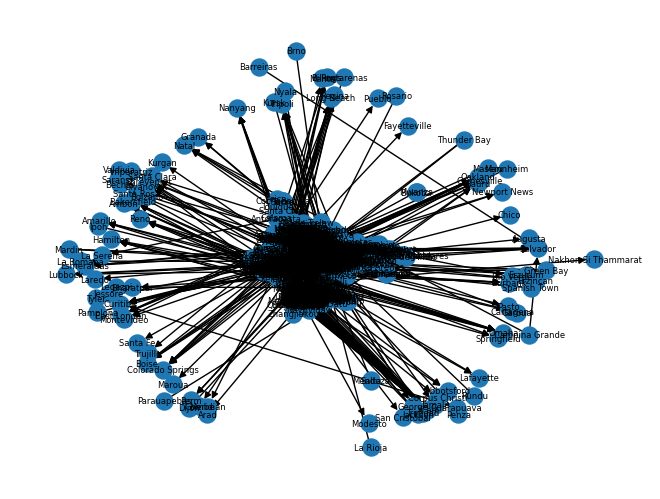

In [ ]:
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt

pos = ForceAtlas2(verbose=False).forceatlas2_networkx_layout(G, pos=None, iterations=50)

nx.draw(G, pos, with_labels=True, node_size=150, font_size=6)
plt.show()


In [150]:
#degree centrality
degree_centrality = nx.degree_centrality(G)
max_degree_centrality = max(degree_centrality, key=degree_centrality.get)
print(f"The node {max_degree_centrality} is connected to {degree_centrality[max_degree_centrality]*100} of all other nodes")

The node Frankfurt is connected to 26.713008937437934 of all other nodes


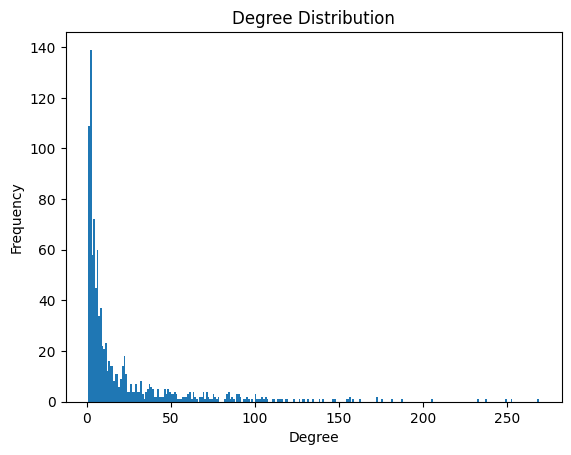

In [148]:
#degree distribution
degrees = [val for (node, val) in G.degree()]
plt.hist(degrees, bins=range(min(degrees), max(degrees)+1, 1))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()